In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Egypt_Houses_Price.csv', sep = ',')

In [ ]:
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Duplex,4000000,3.0,3.0,400.0,No,7,Unknown,Cash,Ready to move,Finished,Nasr City
1,Apartment,4000000,3.0,3.0,160.0,No,10+,Unknown,Cash,Ready to move,Finished,Camp Caesar
2,Apartment,2250000,3.0,2.0,165.0,No,1,Unknown,Cash,Ready to move,Finished,Smoha
3,Apartment,1900000,3.0,2.0,230.0,No,10,Unknown,Cash,Ready to move,Finished,Nasr City
4,Apartment,5800000,2.0,3.0,160.0,No,Ground,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa


In [ ]:
df.tail()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
27356,Town House,890000,3.0,2.0,240.0,Unknown,Unknown,Unknown,Unknown Payment,Unknown,Unknown,North Coast
27357,Town House,4000000,4.0,3.0,218.0,Unknown,Unknown,Unknown,Cash or Installment,Unknown,Finished,New Cairo - El Tagamoa
27358,Twin House,13800000,3.0,4.0,308.0,No,Unknown,Cairo Festival City,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa
27359,Stand Alone Villa,35000000,4.0,4.0,478.0,Unknown,Unknown,Unknown,Unknown Payment,Unknown,Finished,Mokattam
27360,Stand Alone Villa,4800000,5.0,5.0,NaN,No,Unknown,Unknown,Cash,Unknown,Finished,Sheikh Zayed


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27361 entries, 0 to 27360
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            27361 non-null  object
 1   Price           27359 non-null  object
 2   Bedrooms        27158 non-null  object
 3   Bathrooms       27190 non-null  object
 4   Area            26890 non-null  object
 5   Furnished       27361 non-null  object
 6   Level           27361 non-null  object
 7   Compound        27361 non-null  object
 8   Payment_Option  27361 non-null  object
 9   Delivery_Date   27361 non-null  object
 10  Delivery_Term   27361 non-null  object
 11  City            27361 non-null  object
dtypes: object(12)
memory usage: 2.5+ MB


In [ ]:
df.shape

(27361, 12)

In [ ]:
df.isnull().sum()

Type                0
Price               2
Bedrooms          203
Bathrooms         171
Area              471
Furnished           0
Level               0
Compound            0
Payment_Option      0
Delivery_Date       0
Delivery_Term       0
City                0
dtype: int64

In [ ]:
df = df[df['Bathrooms'] != 'Unknown']

In [ ]:
df = df[df['Price'] != 'Unknown']

In [ ]:
df['Area'].replace('Unknown', np.nan)
df['Bedrooms'].replace('Unknown', np.nan)
df['Bathrooms'].replace('Unknown', np.nan)

0        3.0
1        3.0
2        2.0
3        2.0
4        3.0
        ... 
27356    2.0
27357    3.0
27358    4.0
27359    4.0
27360    5.0
Name: Bathrooms, Length: 27324, dtype: object

In [ ]:
df['Bedrooms'] = df['Bedrooms'].replace('10+', '11')
df['Bathrooms'] = df['Bathrooms'].replace('10+', '11')

In [ ]:
df['Area'] = df['Area'].astype(float)
df['Price'] = df['Price'].astype(float)
df['Bedrooms'] = df['Bedrooms'].astype(float)
df['Bathrooms'] = df['Bathrooms'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27324 entries, 0 to 27360
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            27324 non-null  object 
 1   Price           27322 non-null  float64
 2   Bedrooms        27121 non-null  float64
 3   Bathrooms       27153 non-null  float64
 4   Area            26853 non-null  float64
 5   Furnished       27324 non-null  object 
 6   Level           27324 non-null  object 
 7   Compound        27324 non-null  object 
 8   Payment_Option  27324 non-null  object 
 9   Delivery_Date   27324 non-null  object 
 10  Delivery_Term   27324 non-null  object 
 11  City            27324 non-null  object 
dtypes: float64(4), object(8)
memory usage: 2.7+ MB


In [ ]:
df['Bedrooms'].unique()

array([ 3.,  2.,  4.,  5.,  1.,  7.,  6., 11., nan,  8., 10.,  9.])

In [ ]:
df['Bathrooms'].unique()

array([ 3.,  2.,  5.,  1.,  4.,  7., 11.,  6., nan,  8., 10.,  9.])

In [ ]:
df['Area']=df['Area'].fillna(df['Area'].mean())
df['Price']=df['Price'].fillna(df['Price'].mean())
df['Bedrooms']=df['Bedrooms'].fillna(df['Bedrooms'].mean())
df['Bathrooms']=df['Bathrooms'].fillna(df['Bathrooms'].mean())

In [ ]:
df.isnull().sum()

Type              0
Price             0
Bedrooms          0
Bathrooms         0
Area              0
Furnished         0
Level             0
Compound          0
Payment_Option    0
Delivery_Date     0
Delivery_Term     0
City              0
dtype: int64

<Axes: >

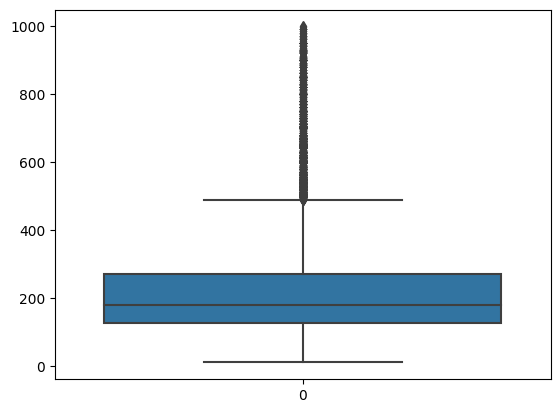

In [ ]:
sns.boxplot(df['Area'])

In [ ]:
Q1=df["Area"].quantile(0.25)
Q2=df["Area"].quantile(0.75)
low2=Q1-(1.5*(Q2-Q1))
up2=Q2+(1.5*(Q2-Q1))
df.loc[df["Area"] <low2,"Area"]=low2
df.loc[df["Area"] >up2,"Area"]=up2

In [ ]:
#df.boxplot(['Area'])

In [ ]:
#sns.boxplot(df['Area'])

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df['Area'] = scaler.fit_transform(df[['Area']])
# df['Price'] = scaler.fit_transform(df[['Price']])
# df['Bedrooms'] = scaler.fit_transform(df[['Bedrooms']])
# df['Bathrooms'] = scaler.fit_transform(df[['Bathrooms']])

In [ ]:
float_columns = ['Area', 'Price', 'Bedrooms', 'Bathrooms']
df[float_columns] = df[float_columns].astype(int)

In [ ]:
df['Furnished'].unique()

array(['No', 'Unknown', 'Yes'], dtype=object)

In [ ]:
df['Level'].unique()

array(['7', '10+', '1', '10', 'Ground', 'Highest', '3', '2', '4', '9',
       '5', '8', '6', 'Unknown'], dtype=object)

In [ ]:
df['Type'].unique()

array(['Duplex', 'Apartment', 'Penthouse', 'Studio', 'Chalet',
       'Standalone Villa', 'Twin house', 'Town House',
       'Stand Alone Villa', 'Twin House'], dtype=object)

In [ ]:
df['Payment_Option'].unique()

array(['Cash', 'Cash or Installment', 'Unknown Payment', 'Installment'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['Type','Furnished', 'Level', 'Compound', 'Payment_Option', 'Delivery_Date', 'Delivery_Term', 'City']

# Apply label encoding to each categorical column
label_encoder = LabelEncoder()

for column in categorical_columns:
    encoded_labels = label_encoder.fit_transform(df[column])
    df[column + '_e'] = encoded_labels

In [ ]:
#df.head()

In [ ]:
columns_to_drop = ['Type','Furnished', 'Level', 'Compound', 'Payment_Option', 'Delivery_Date', 'Delivery_Term', 'City']
df.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
df.head()

,Price,Bedrooms,Bathrooms,Area,Type_e,Furnished_e,Level_e,Compound_e,Payment_Option_e,Delivery_Date_e,Delivery_Term_e,City_e
0,4000000,3,3,400,2,0,8,530,0,6,1,116
1,4000000,3,3,160,0,0,2,530,0,6,1,41
2,2250000,3,2,165,0,0,0,530,0,6,1,162
3,1900000,3,2,230,0,0,1,530,0,6,1,116
4,5800000,2,3,160,0,0,11,139,0,6,3,118


In [ ]:
X = df.iloc[:,0:12].values

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std =  sc.fit_transform(X) 

In [ ]:
cov_matrix = np.cov(X_std.T)
print("cov_matrix shape:",cov_matrix.shape)
print("Covariance_matrix",cov_matrix)

cov_matrix shape: (12, 12)
Covariance_matrix [[ 1.00003660e+00  4.85977356e-01  5.56511249e-01  5.26991200e-01
   3.21110385e-01  3.92883275e-02  3.57246429e-01 -1.02789530e-01
  -1.30557396e-01 -2.45607739e-03 -1.65716776e-02  1.01682662e-01]
 [ 4.85977356e-01  1.00003660e+00  8.09831177e-01  7.17698576e-01
   4.50236434e-01 -3.60622854e-02  4.60972314e-01 -2.47265338e-02
  -8.39734261e-02  1.29215882e-02  1.23208579e-01  1.10550305e-01]
 [ 5.56511249e-01  8.09831177e-01  1.00003660e+00  7.32196992e-01
   5.05172433e-01 -2.74550031e-02  4.91393617e-01 -1.01116538e-01
  -7.74538741e-02 -2.84870102e-02  1.14239080e-01  1.25638404e-01]
 [ 5.26991200e-01  7.17698576e-01  7.32196992e-01  1.00003660e+00
   5.08709335e-01 -2.98813876e-02  5.31128571e-01 -4.42281910e-02
  -1.23558328e-01  1.19209496e-02  1.41972052e-01  1.06048170e-01]
 [ 3.21110385e-01  4.50236434e-01  5.05172433e-01  5.08709335e-01
   1.00003660e+00 -2.35905333e-02  6.43048049e-01 -1.10591573e-01
   2.36979209e-02 -6.929863

In [ ]:
#creating eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.3446385   0.09398893  0.06800652 -0.0956717  -0.81895255 -0.21570065
  -0.13457654 -0.17198456  0.1917649   0.23235466  0.03272992 -0.0433488 ]
 [-0.43322732  0.64667953  0.36087297  0.02398528  0.39883195 -0.02753379
  -0.02904136 -0.17536317  0.20553226  0.09054347 -0.14224485  0.03491677]
 [-0.45170428 -0.75046649  0.29914586 -0.07004868  0.25313922 -0.05435776
   0.00846493 -0.13205677  0.19456523  0.11161111 -0.05817719 -0.011229  ]
 [-0.44198288  0.01006976 -0.85793339  0.12975422  0.14787803 -0.02880313
  -0.03547082 -0.03542631  0.10736893  0.02269423 -0.11962478  0.00999736]
 [-0.36564614  0.07224047 -0.02097993 -0.70655092 -0.01298035  0.15251931
   0.11681692  0.16145004 -0.45531439 -0.23928226  0.14213811 -0.11626041]
 [ 0.01461167  0.00811451 -0.00965172 -0.00718039  0.14246119  0.19818476
  -0.62400265  0.25615846 -0.10528109  0.5136332   0.21479229 -0.40492986]
 [-0.37048596 -0.02157486  0.17690749  0.67848608 -0.15639644  0.14560064
   0.03153472 

In [ ]:
# Sort the eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

In [ ]:
# Choose the number of components
n_components = 4 

In [ ]:
selected_eigenvectors = sorted_eigenvectors[:, :n_components]

# Transform the data using the selected eigenvectors
reduced_data = np.dot(X_std, selected_eigenvectors)

In [ ]:
components = ['PC{}'.format(i) for i in range(1, n_components + 1)]
principal_df = pd.DataFrame(data=reduced_data, columns=components)

In [ ]:
# Display the final dataset with principal components
final_df = pd.concat([df, principal_df], axis=1)
print(final_df.head())

       Price  Bedrooms  Bathrooms   Area  Type_e  Furnished_e  Level_e  \
0  4000000.0       3.0        3.0  400.0     2.0          0.0      8.0   
1  4000000.0       3.0        3.0  160.0     0.0          0.0      2.0   
2  2250000.0       3.0        2.0  165.0     0.0          0.0      0.0   
3  1900000.0       3.0        2.0  230.0     0.0          0.0      1.0   
4  5800000.0       2.0        3.0  160.0     0.0          0.0     11.0   

   Compound_e  Payment_Option_e  Delivery_Date_e  Delivery_Term_e  City_e  \
0       530.0               0.0              6.0              1.0   116.0   
1       530.0               0.0              6.0              1.0    41.0   
2       530.0               0.0              6.0              1.0   162.0   
3       530.0               0.0              6.0              1.0   116.0   
4       139.0               0.0              6.0              3.0   118.0   

        PC1       PC2       PC3       PC4  
0 -0.484916 -1.099672 -0.130957 -1.027885  
1  1